In [1]:
from dyeles import DyeLeS
from rdkit import Chem

/home/water/miniforge3/envs/DyeLeS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


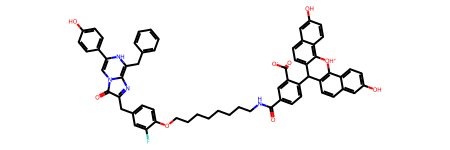

In [ ]:
scorer = DyeLeS()
smiles = "O=C(NCCCCCCCCOc1ccc(Cc2nc3c(Cc4ccccc4)[nH]c(-c4ccc(O)cc4)cn-3c2=O)cc1F)c1ccc(C2c3ccc4cc(O)ccc4c3[OH+]c3c2ccc2cc(O)ccc32)c(C(=O)[O-])c1"
mol = Chem.MolFromSmiles(smiles)
mol

In [21]:
import pickle
import gzip

fscore = pickle.load(gzip.open("/home/water/projects/DyeLeS/dyeles/resources/dye.model.gz", "rb"))["fscore"]

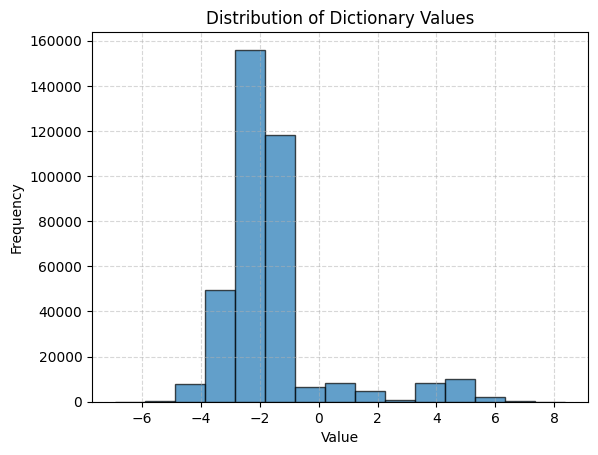

In [22]:
import matplotlib.pyplot as plt

# 绘制直方图
plt.hist(fscore.values(), bins=15, edgecolor="black", alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Dictionary Values")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [3]:
score = scorer(smiles)
print(f"score: {score}")

score: 1.1746077781570965


In [4]:
score, confidence = scorer(smiles, return_confidence=True)
print(f"score: {score}, confidence: {confidence}")

score: 1.1746077781570965, confidence: 1.0


In [5]:
score = scorer(smiles, use_standardizer=False)
print(f"score (no standardizer): {score}")

score (no standardizer): 1.1210737686408654


In [6]:
smiles_list = ["CCCCCCN1/C(=C/C=C2\CCCC(/C=C/C3=[N+](CCCCCC)c4ccccc4C3(C)C)=C2Cl)C(C)(C)c2ccccc21", "[O]C(=O)c1ccc(C([O])=O)c(C2=c3cc4c5c(c3Oc3c2cc2c6c3CCCN6CCC2)CCC[N+]=5CCC4)c1"]
scores = scorer(smiles_list)
print(scores)

Scoring molecules: 100%|██████████| 2/2 [00:00<00:00, 300.23it/s]

[1.6281662702099506, 2.0542538073251198]
